<a href="https://colab.research.google.com/github/GuilhermeSecco/Analise-de-dados-com-Python-e-Pandas/blob/main/Thompson_Sampling_Comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Thompson turned out to be 106% better than random selection


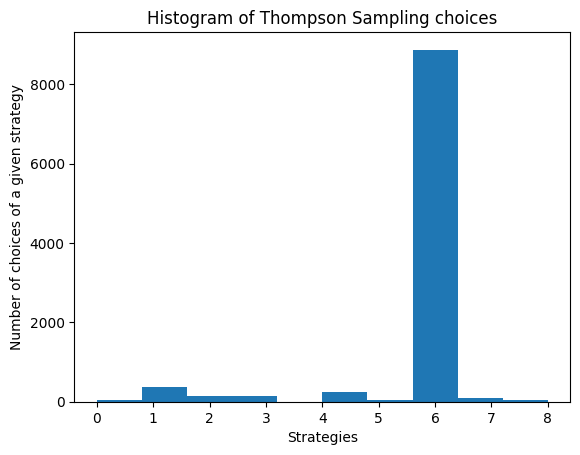

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import random

rates = [0.05,0.13,0.09,0.16,0.11,0.04,0.20,0.08,0.01]
N = 10000
d = len(rates)

def environment(rates, N):
    d = len(rates)
    X = np.zeros((N, d))
    for i in range(N):
        for j in range(d):
            if np.random.rand() < rates[j]:
                X[i][j] += 1
    return X

def randomSelection(X):
    N, d = X.shape
    strategiesSelected = []
    totalReward = 0
    for i in range(N):
        strategy = random.randrange(d)
        reward = X[i, strategy]
        totalReward += reward
        strategiesSelected.append(strategy)
    return totalReward, strategiesSelected

def thompsonSampling(X):
    N, d = X.shape
    strategiesSelected = []
    totalReward = 0
    reward1 = [0]*d
    reward0 = [0]*d

    for i in range(N):
        select = 0
        maxRandom = 0
        for j in range(d):
            maxBeta = np.random.beta(reward1[j]+1,reward0[j]+1)
            if maxBeta > maxRandom:
                maxRandom = maxBeta
                select = j
        reward = X[i][select]

        if reward == 1:
            reward1[select] += 1
        else:
            reward0[select] += 1

        totalReward += reward
        strategiesSelected.append(select)

    return totalReward, strategiesSelected

X = environment(rates, N)
totalRewardRS, strategiesSelectedRS = randomSelection(X)
totalRewardTS, strategiesSelectedTS = thompsonSampling(X)

relativeReturn = (totalRewardTS - totalRewardRS) / totalRewardRS * 100
print("Thompson turned out to be {:.0f}%".format(relativeReturn), 'better than random selection')

plt.hist(strategiesSelectedTS)
plt.title('Histogram of Thompson Sampling choices')
plt.xlabel('Strategies')
plt.ylabel('Number of choices of a given strategy')
plt.show()